In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
df = pd.read_csv('Total_weather_dataset_in_HCM.csv')
del df['Unnamed: 0']
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date
0,12:00 AM,79 °F,75 °F,89 %,ESE,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
1,12:30 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
2,1:00 AM,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05
3,1:30 AM,77 °F,75 °F,94 %,E,5 mph,0 mph,29.85 in,0.0 in,2022-11-05
4,2:00 AM,75 °F,75 °F,100 %,E,6 mph,0 mph,29.85 in,0.0 in,2022-11-05
...,...,...,...,...,...,...,...,...,...,...
4573,9:30 PM,81 °F,77 °F,89 %,VAR,1 mph,0 mph,29.73 in,0.0 in,2022-08-02
4574,10:00 PM,81 °F,77 °F,89 %,SW,3 mph,0 mph,29.76 in,0.0 in,2022-08-02
4575,10:30 PM,81 °F,77 °F,89 %,SW,5 mph,0 mph,29.76 in,0.0 in,2022-08-02
4576,11:00 PM,81 °F,77 °F,89 %,SW,6 mph,0 mph,29.76 in,0.0 in,2022-08-02


In [4]:
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')
df['DateTime']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,00:00:00,79 °F,75 °F,89 %,ESE,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:00:00
1,00:30:00,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:30:00
2,01:00:00,77 °F,75 °F,94 %,E,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 01:00:00
3,01:30:00,77 °F,75 °F,94 %,E,5 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 01:30:00
4,02:00:00,75 °F,75 °F,100 %,E,6 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,21:30:00,81 °F,77 °F,89 %,VAR,1 mph,0 mph,29.73 in,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,22:00:00,81 °F,77 °F,89 %,SW,3 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,22:30:00,81 °F,77 °F,89 %,SW,5 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,23:00:00,81 °F,77 °F,89 %,SW,6 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 23:00:00


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Wind']=le.fit_transform(df['Wind'])
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,00:00:00,79 °F,75 °F,89 %,3,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:00:00
1,00:30:00,77 °F,75 °F,94 %,1,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 00:30:00
2,01:00:00,77 °F,75 °F,94 %,1,6 mph,0 mph,29.88 in,0.0 in,2022-11-05,2022-11-05 01:00:00
3,01:30:00,77 °F,75 °F,94 %,1,5 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 01:30:00
4,02:00:00,75 °F,75 °F,100 %,1,6 mph,0 mph,29.85 in,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,21:30:00,81 °F,77 °F,89 %,14,1 mph,0 mph,29.73 in,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,22:00:00,81 °F,77 °F,89 %,13,3 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,22:30:00,81 °F,77 °F,89 %,13,5 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,23:00:00,81 °F,77 °F,89 %,13,6 mph,0 mph,29.76 in,0.0 in,2022-08-02,2022-08-02 23:00:00


In [6]:
for i in range(0, len(df['Temperature'])):
    df['Temperature'][i] = int(df['Temperature'][i][1:-3])
    df['Dew Point'][i] = int(df['Dew Point'][i][1:-3])
    df['Humidity'][i] = int(df['Humidity'][i][1:-2])
    df['Wind Speed'][i] = int(df['Wind Speed'][i][1:-4])
    df['Pressure'][i] = float(df['Pressure'][i][1:-3])
df

C:\Users\Vungo\AppData\Local\Temp\ipykernel_3272\1609818620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature'][i] = int(df['Temperature'][i][1:-3])
C:\Users\Vungo\AppData\Local\Temp\ipykernel_3272\1609818620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dew Point'][i] = int(df['Dew Point'][i][1:-3])
C:\Users\Vungo\AppData\Local\Temp\ipykernel_3272\1609818620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,00:00:00,79,75,89,3,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:00:00
1,00:30:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:30:00
2,01:00:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 01:00:00
3,01:30:00,77,75,94,1,5,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 01:30:00
4,02:00:00,75,75,100,1,6,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,21:30:00,81,77,89,14,1,0 mph,29.73,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,22:00:00,81,77,89,13,3,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,22:30:00,81,77,89,13,5,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,23:00:00,81,77,89,13,6,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 23:00:00


In [8]:
df.to_csv('Total.csv')

In [124]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df.Temperature.dropna())
print('p-value: ', results[1])

p-value:  9.382448325854214e-24


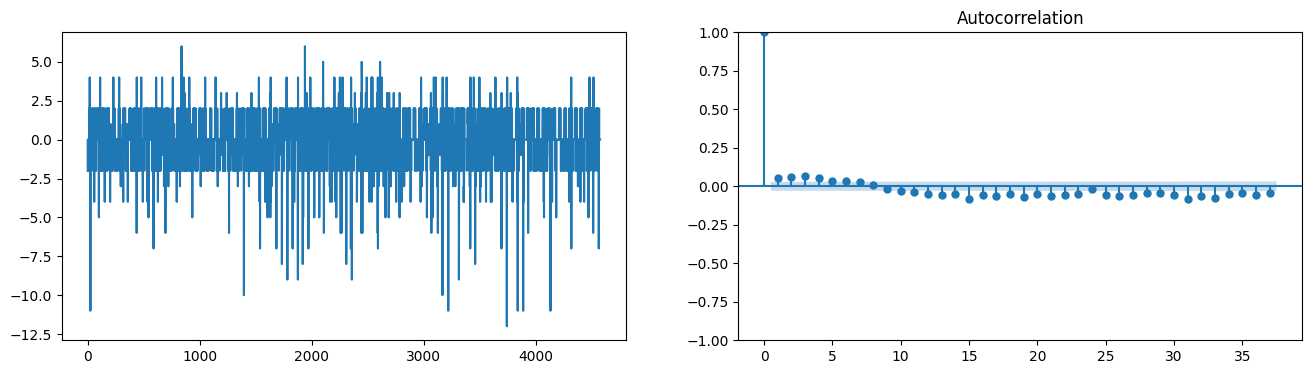

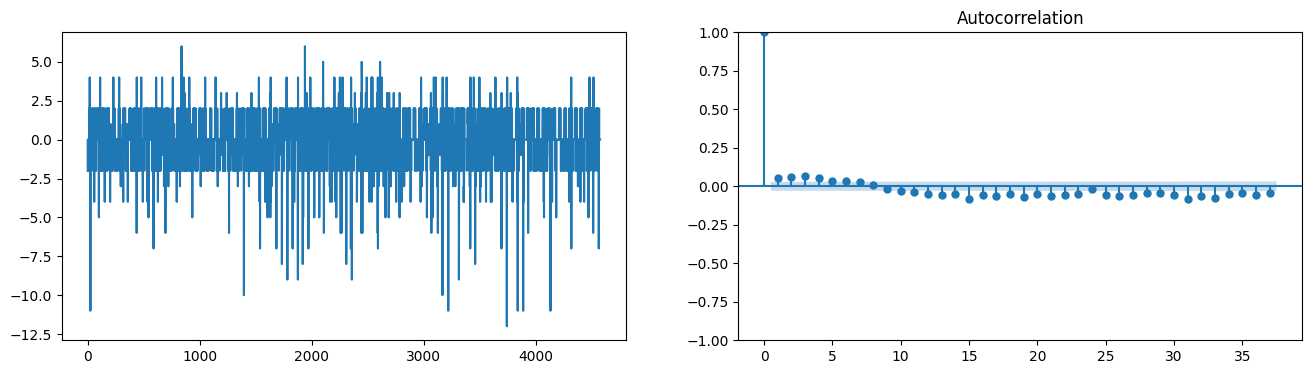

In [125]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

diff = df.Temperature.diff().dropna()

ax1.plot(diff)
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2)
# plot_acf(diff, ax=ax2)

/home/tomato/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


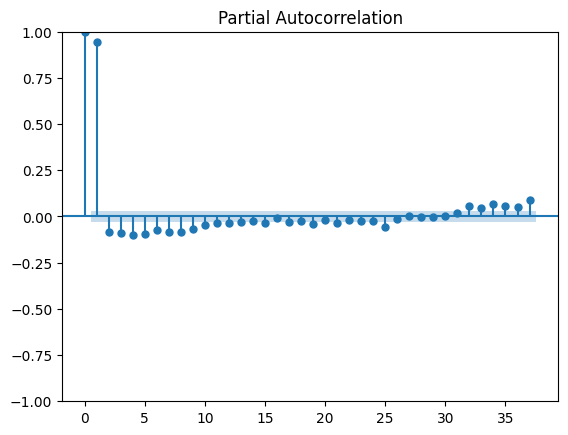

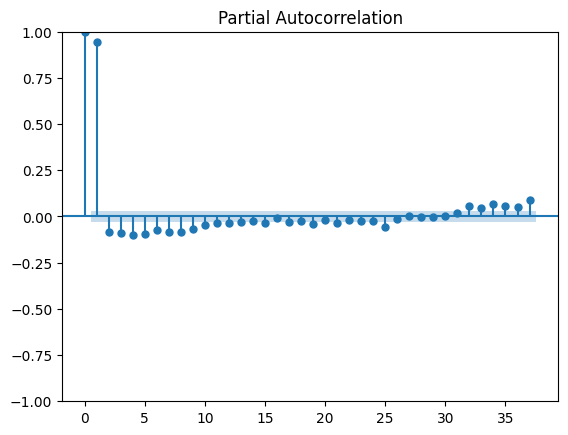

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df.Temperature.dropna())

In [167]:
from pmdarima.arima import auto_arima
auto_arima(train['Humidity'])

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [165]:
milestone = datetime.datetime(2022,10,1,00,00,00)
df2 = df.groupby(df.index).agg({'Humidity': 'max'}) 
train = df2.loc[df['DateTime'] > milestone].copy().iloc[::-1]
train = train.reset_index()
del train['index']
val = df2.loc[df['DateTime'] <= milestone].copy().iloc[::-1]
val = val.reset_index()
del val['index']

In [159]:
train

,Humidity
0,100
1,100
2,94
3,100
4,100
...,...
1697,100
1698,94
1699,94
1700,94


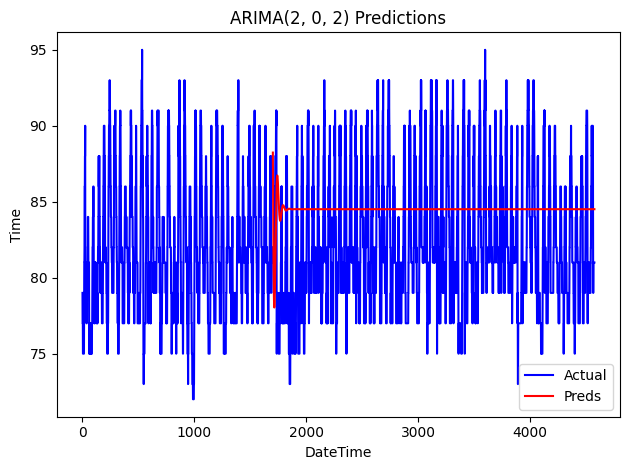

1702    88.235301
1703    86.797383
1704    85.436766
1705    84.168217
1706    83.003943
          ...    
4573    84.509094
4574    84.509094
4575    84.509094
4576    84.509094
4577    84.509094
Name: predicted_mean, Length: 2876, dtype: float64


In [168]:
from statsmodels.tsa.arima.model import ARIMA
# df2 = df.groupby(df.index).agg({'Temperature': 'max'}) 
milestone = datetime.datetime(2022,10,1,00,00,00)

def plot_arima_model(order=(0, 0, 0), 
                    seasonal_order=(0, 0, 0, 0), 
                    savefig=False):
    if seasonal_order == (0, 0, 0, 0):
        title = f'ARIMA{order} Predictions'
    else:
        title = f'SARIMA{order}{seasonal_order} Predictions' 
    arima  = ARIMA(train['Humidity'], order=order)
    result = arima.fit()

    # Predict len(val) timesteps into the future
    predictions = result.forecast(len(val['Humidity']))
    # predictions = result.predict(val)

    # Plot
    fig, ax = plt.subplots()
    ax.plot(df['Temperature'], 'b', label='Actual')
    ax.plot(predictions, 'r', label='Preds')
    ax.set(xlabel='DateTime', ylabel='Time',
            title=title)
    plt.legend()
    plt.tight_layout()
    if savefig:
        plt.savefig(title)
    plt.show()
    return predictions

# Plot ARIMA(1,1,1)
b = plot_arima_model(order=(2, 0, 2))
print(b)

In [ ]:
milestone = datetime.datetime(2022,10,1,00,00,00)
train = df.loc[df.index < milestone].copy().iloc[::-1]
val = df.loc[df.index >= milestone].copy().iloc[::-1]

In [ ]:
train = df2.loc[df.index > milestone]['Temperature'].copy().iloc[::-1]
train

DateTime
2022-09-07 12:00:00    81
2022-09-07 11:30:00    81
2022-09-07 11:00:00    84
2022-09-07 10:30:00    82
2022-09-07 10:00:00    82
                       ..
2022-08-02 02:00:00    81
2022-08-02 01:30:00    81
2022-08-02 01:00:00    81
2022-08-02 00:30:00    81
2022-08-02 00:00:00    81
Name: Temperature, Length: 1702, dtype: int64

In [ ]:
train = df.loc[df.index < milestone]['Temperature'].copy().iloc[::-1]
val = df.loc[df.index >= milestone]['Temperature'].copy().iloc[::-1]
train

DateTime
2022-08-02 23:30:00    81
2022-08-02 23:00:00    81
2022-08-02 22:30:00    81
2022-08-02 22:00:00    81
2022-08-02 21:30:00    81
                       ..
2022-09-30 02:00:00    77
2022-09-30 01:30:00    79
2022-09-30 01:00:00    79
2022-09-30 00:30:00    79
2022-09-30 00:00:00    79
Name: Temperature, Length: 2875, dtype: object

In [ ]:
df2 = df.groupby(df.index).agg({'Temperature': 'max'}) 
df3 = df2.loc[df.index >= milestone]['Temperature'].copy().iloc[::-1]
df3

DateTime
2022-09-07 12:00:00    81
2022-09-07 11:30:00    81
2022-09-07 11:00:00    84
2022-09-07 10:30:00    82
2022-09-07 10:00:00    82
                       ..
2022-08-02 02:00:00    81
2022-08-02 01:30:00    81
2022-08-02 01:00:00    81
2022-08-02 00:30:00    81
2022-08-02 00:00:00    81
Name: Temperature, Length: 1703, dtype: int64

False